<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importacion" data-toc-modified-id="Importacion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importacion</a></span></li><li><span><a href="#Carga-de-señal" data-toc-modified-id="Carga-de-señal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga de señal</a></span></li><li><span><a href="#Visualizacion-de-la-señal" data-toc-modified-id="Visualizacion-de-la-señal-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizacion de la señal</a></span></li><li><span><a href="#Filtros" data-toc-modified-id="Filtros-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Filtros</a></span><ul class="toc-item"><li><span><a href="#Pasa-bajas" data-toc-modified-id="Pasa-bajas-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Pasa bajas</a></span></li><li><span><a href="#Pasa-altas" data-toc-modified-id="Pasa-altas-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pasa altas</a></span></li></ul></li></ul></div>

# Filtrado señal ECG

## Importacion

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg
import pandas as pd
from biosppy import storage


/home/davinchi/Documents/Projects/tutoriales/Biomedica/venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Carga de señal

In [3]:
signal, mdata = storage.load_txt('datos/ecg.txt')

In [4]:
mdata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

## Visualizacion de la señal

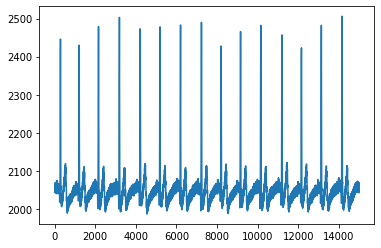

In [5]:
plt.plot(signal)
plt.show()

## Filtros

### Pasa bajas

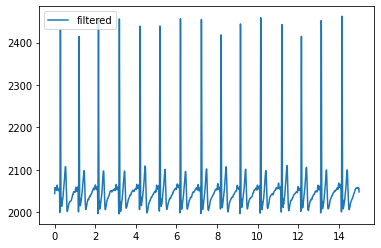

In [6]:
fs = mdata["sampling_rate"]
t = np.arange(len(signal)) / fs

fc = 30  # Frecuencia de corte
w = fc / (fs / 2) # Frecuencia normalizada
N = 5 # orden del filtro
b, a = sg.butter(N, w, 'low') 
output = sg.filtfilt(b, a, signal)
plt.plot(t, output, label='filtered')
plt.legend()
plt.show()

### Pasa altas
Ruido en ECG

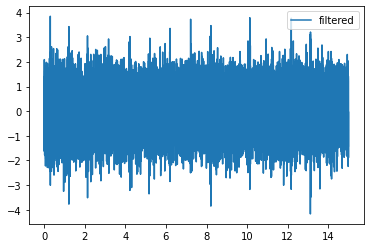

In [7]:
fs = mdata["sampling_rate"]
t = np.arange(len(signal)) / fs

fc = 100  # Frecuencia de corte
w = fc / (fs / 2) # Frecuencia normalizada
N = 5 # orden del filtro
b, a = sg.butter(N, w, 'high') 
output = sg.filtfilt(b, a, signal)
plt.plot(t, output, label='filtered')
plt.legend()
plt.show()